## OSM 2018 Homework 3

#### John Stachurski

In [2]:
import numpy as np
import quantecon as qe
import matplotlib.pyplot as plt


In [this paper](http://www.econ.nyu.edu/user/benhabib/Binder4.pdf), Jess Benhabib, Alberto Bisin and Mi Luo study the wealth distribution and social mobility in the US in recent decades.

In table 3 they display this matrix, which shows the probability of transitions across wealth percentiles from one generation to the next.

In [3]:
P = [[0.222, 0.222, 0.215, 0.187, 0.081, 0.038, 0.029, 0.006],
     [0.221, 0.220, 0.215, 0.188, 0.082, 0.039, 0.029, 0.006],
     [0.207, 0.209, 0.210, 0.194, 0.090, 0.046, 0.036, 0.008],
     [0.198, 0.201, 0.207, 0.198, 0.095, 0.052, 0.040, 0.009],
     [0.175, 0.178, 0.197, 0.207, 0.110, 0.067, 0.054, 0.012],
     [0.182, 0.184, 0.200, 0.205, 0.106, 0.062, 0.050, 0.011],
     [0.123, 0.125, 0.166, 0.216, 0.141, 0.114, 0.094, 0.021],
     [0.084, 0.084, 0.142, 0.228, 0.170, 0.143, 0.121, 0.028]]

### Exercise 1

Compute and plot the stationary distribution of the matrix using one of the methods in `quantecon`'s `MarkovChain` object, combined with `matplotlib`.

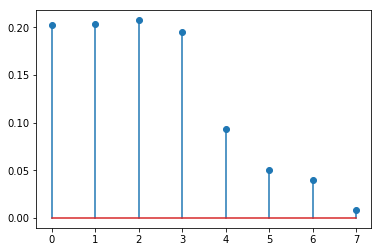

In [25]:
dist = qe.MarkovChain(P).stationary_distributions.flatten()
plt.stem(dist)
plt.show()

### Exercise 2

This Markov chain is asymptotically stationary and ergodic, which means that, for any sample path $\{X_t\}$ generated according to $P$, we have

$$ \lim_{n \to \infty} \frac{1}{n} \sum_{t=1}^n \mathbb 1\{X_t = j\} = \psi(j) $$

where $\psi$ is the stationary distribution and $j$ is an integer between 0 and 7 (the set of possible states).

Use this fact to compute an approximation to the stationary distribution $\psi$.  Confirm visually that your result is similar to the stationary distribution you computed in exercise 1.

You can make use of the `simulate` method in `MarkovChain`.

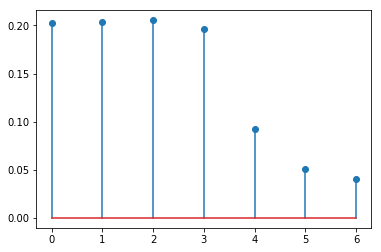

In [53]:
n = 100000
Xt_ts = qe.MarkovChain(P).simulate(n)
sim_dist = [(1 / n) * np.sum(Xt_ts == j) for j in range(7)]
plt.stem(sim_dist)
plt.show()

### Exercise 3

Ergodicity also implies that, if we simulate a large number of paths and then look at the cross section at some $T$, where $T$ is suitably large, then the empirical distribution should be close to the stationary distribution.

Confirm this by simulation and visual inspection, as above.

(In this context, the empirical distribution of a sample is the fraction of observations that take value $j$ for each $j$ in $0, \ldots, 7$.)

In [50]:
Xt_cs = np.empty(100)
Xt_cs = [qe.MarkovChain(P).simulate(n) for i in range(len(Xt_cs))]

In [55]:
cs_dist = [(1 / len(Xt_cs)) * np.sum(Xt_cs[len(Xt_cs) - 1] == j) for j in range(7)]

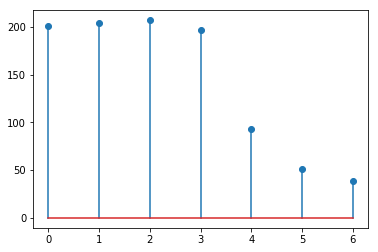

In [56]:
plt.stem(cs_dist)
plt.show()